--- Starting Verification for Merged DEM ---


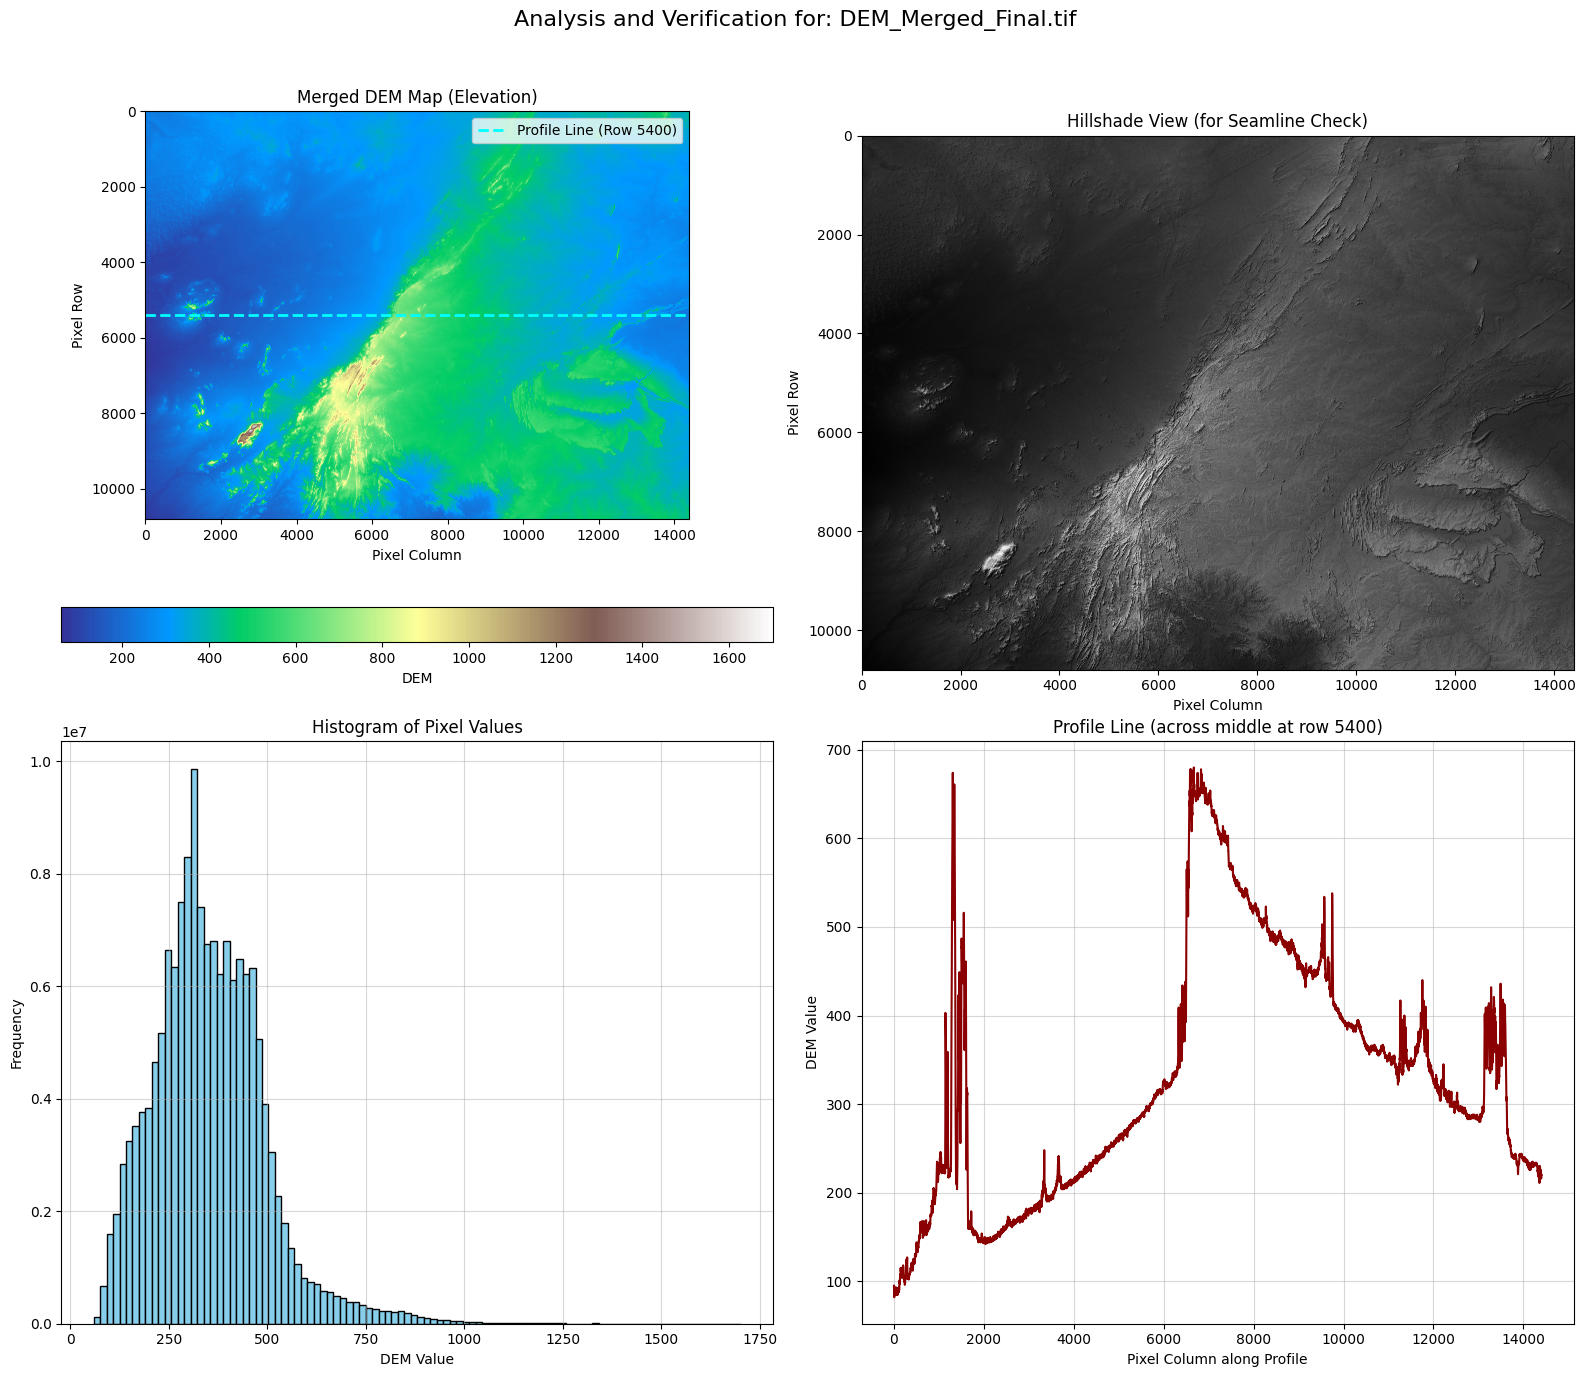


--- Starting Verification for Merged NDVI ---


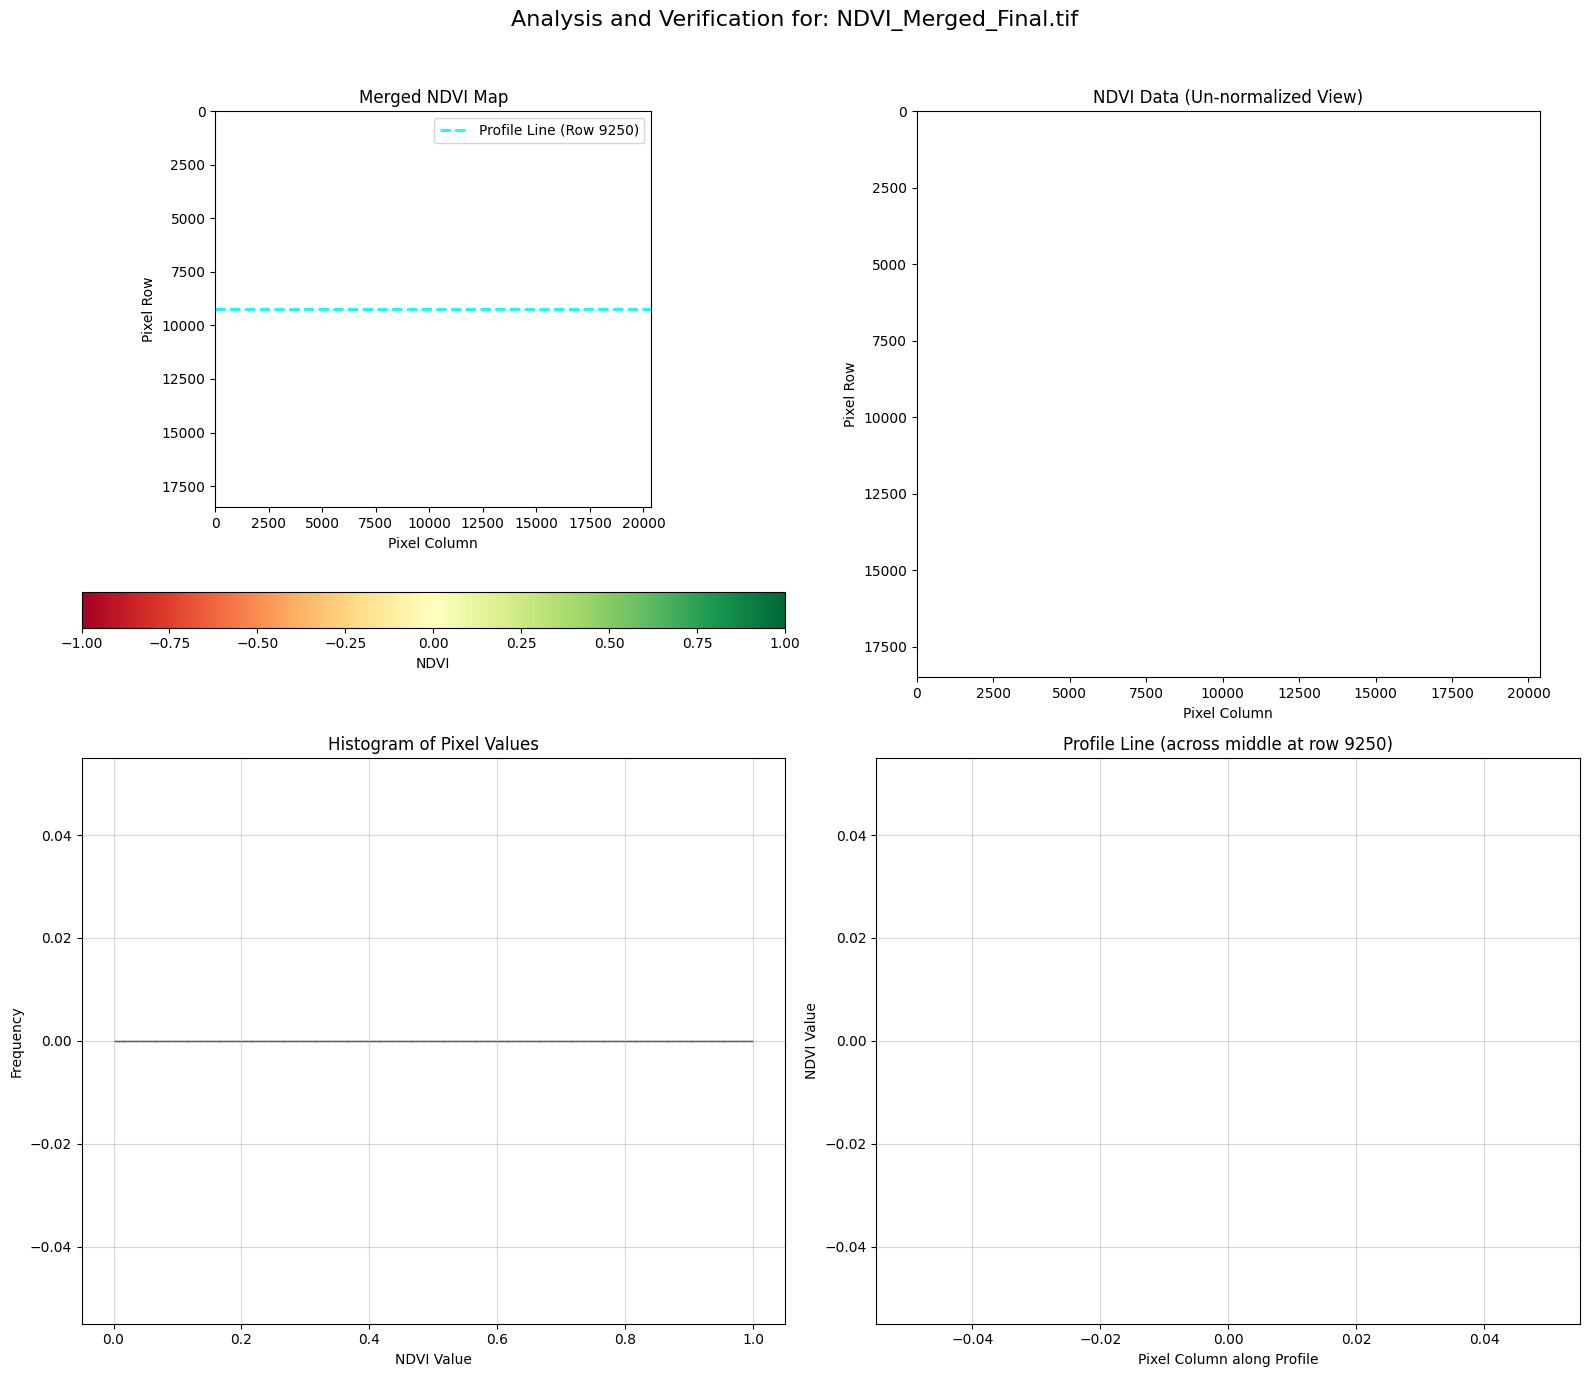


Verification script finished.


In [3]:
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
from matplotlib.colors import Normalize

def analyze_and_plot_raster(raster_path, analysis_type, profile_line_y_percent=0.5):
    """
    Opens a raster file and generates a multi-panel plot for visualization and analysis.

    Args:
        raster_path (str): The full path to the raster file.
        analysis_type (str): The type of analysis, either 'DEM' or 'NDVI'.
        profile_line_y_percent (float): The vertical position of the profile line
                                        as a percentage of the raster height (0.0 to 1.0).
    """
    if not os.path.exists(raster_path):
        print(f"!!! Error: File not found at '{raster_path}'. Please check the path.")
        return

    try:
        with rasterio.open(raster_path) as src:
            # Read the main raster data
            data = src.read(1)
            nodata_val = src.nodata
            
            # Create a masked array to properly handle NoData values in plots
            masked_data = np.ma.masked_equal(data, nodata_val)

            # --- Setup Plotting ---
            # Create a 2x2 grid for our plots
            fig, axs = plt.subplots(2, 2, figsize=(16, 14))
            fig.suptitle(f"Analysis and Verification for: {os.path.basename(raster_path)}", fontsize=16)

            # --- Plot 1: Main Raster Map ---
            ax1 = axs[0, 0]
            if analysis_type == 'NDVI':
                # Use a standard NDVI color ramp (RdYlGn)
                cmap = 'RdYlGn'
                norm = Normalize(vmin=-1, vmax=1)
                title = 'Merged NDVI Map'
            else: # DEM
                cmap = 'terrain'
                norm = Normalize() # Auto-scales colors
                title = 'Merged DEM Map (Elevation)'
            
            im = ax1.imshow(masked_data, cmap=cmap, norm=norm)
            fig.colorbar(im, ax=ax1, orientation='horizontal', label=analysis_type)
            ax1.set_title(title)
            ax1.set_xlabel('Pixel Column')
            ax1.set_ylabel('Pixel Row')
            
            # --- Plot 2: Hillshade (for DEM) or Data Distribution (for NDVI) ---
            ax2 = axs[0, 1]
            if analysis_type == 'DEM':
                # Generate and display a hillshade to check for seamlines
                from rasterio.plot import show_hillshade
                ls = plt.matplotlib.colors.LightSource(azdeg=315, altdeg=45)
                hillshade = ls.shade(data, cmap=plt.get_cmap('gray'), vert_exag=1.0, blend_mode='overlay')
                ax2.imshow(hillshade, cmap='gray')
                ax2.set_title('Hillshade View (for Seamline Check)')
            else: # NDVI
                # For NDVI, let's just show the data again without color normalization
                # to highlight subtle variations
                ax2.imshow(masked_data, cmap=cmap)
                ax2.set_title('NDVI Data (Un-normalized View)')

            ax2.set_xlabel('Pixel Column')
            ax2.set_ylabel('Pixel Row')

            # --- Plot 3: Histogram ---
            ax3 = axs[1, 0]
            # Flatten the array and remove NoData values for histogram
            valid_data = masked_data[~masked_data.mask].flatten()
            ax3.hist(valid_data, bins=100, color='skyblue', edgecolor='black')
            ax3.set_title('Histogram of Pixel Values')
            ax3.set_xlabel(f'{analysis_type} Value')
            ax3.set_ylabel('Frequency')
            ax3.grid(True, alpha=0.5)

            # --- Plot 4: Profile Line ---
            ax4 = axs[1, 1]
            # Extract a horizontal profile line from the middle of the raster
            profile_row = int(masked_data.shape[0] * profile_line_y_percent)
            profile_data = masked_data[profile_row, :]
            
            ax4.plot(profile_data, color='darkred')
            ax4.set_title(f'Profile Line (across middle at row {profile_row})')
            ax4.set_xlabel('Pixel Column along Profile')
            ax4.set_ylabel(f'{analysis_type} Value')
            ax4.grid(True, alpha=0.5)
            
            # Also show the location of the profile line on the main map
            ax1.axhline(y=profile_row, color='cyan', linestyle='--', linewidth=2, label=f'Profile Line (Row {profile_row})')
            ax1.legend(loc='upper right')

            plt.tight_layout(rect=[0, 0, 1, 0.96])
            plt.show()

    except Exception as e:
        print(f"An error occurred while processing {raster_path}: {e}")


# --- MAIN SCRIPT EXECUTION ---
if __name__ == "__main__":
    # --- USER: VERIFY YOUR MERGED FILE PATHS HERE ---
    
    # Path to your final merged DEM file created by the previous script
    merged_dem_path = "/Users/macbook/Documents/Geo_spatial_Project/Data/DEM_Merged_Final.tif"
    
    # Path to your final merged NDVI file created by the previous script
    merged_ndvi_path = "/Users/macbook/Documents/Geo_spatial_Project/Data/Ndvi_output/NDVI_Merged_Final.tif"

    # You can adjust the vertical position of the profile line here (0.5 = middle)
    # To check a different area, change this value (e.g., 0.25 for 25% from the top)
    profile_line_position = 0.5 
    
    # --- END OF USER SETTINGS ---

    print("--- Starting Verification for Merged DEM ---")
    analyze_and_plot_raster(merged_dem_path, 'DEM', profile_line_position)

    print("\n--- Starting Verification for Merged NDVI ---")
    analyze_and_plot_raster(merged_ndvi_path, 'NDVI', profile_line_position)
    
    print("\nVerification script finished.")import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
from matplotlib.colors import Normalize

def analyze_and_plot_raster(raster_path, analysis_type, profile_line_y_percent=0.5):
    """
    Opens a raster file and generates a multi-panel plot for visualization and analysis.

    Args:
        raster_path (str): The full path to the raster file.
        analysis_type (str): The type of analysis, either 'DEM' or 'NDVI'.
        profile_line_y_percent (float): The vertical position of the profile line
                                        as a percentage of the raster height (0.0 to 1.0).
    """
    if not os.path.exists(raster_path):
        print(f"!!! Error: File not found at '{raster_path}'. Please check the path.")
        return

    try:
        with rasterio.open(raster_path) as src:
            # Read the main raster data
            data = src.read(1)
            nodata_val = src.nodata
            
            # Create a masked array to properly handle NoData values in plots
            masked_data = np.ma.masked_equal(data, nodata_val)

            # --- Setup Plotting ---
            # Create a 2x2 grid for our plots
            fig, axs = plt.subplots(2, 2, figsize=(16, 14))
            fig.suptitle(f"Analysis and Verification for: {os.path.basename(raster_path)}", fontsize=16)

            # --- Plot 1: Main Raster Map ---
            ax1 = axs[0, 0]
            if analysis_type == 'NDVI':
                # Use a standard NDVI color ramp (RdYlGn)
                cmap = 'RdYlGn'
                norm = Normalize(vmin=-1, vmax=1)
                title = 'Merged NDVI Map'
            else: # DEM
                cmap = 'terrain'
                norm = Normalize() # Auto-scales colors
                title = 'Merged DEM Map (Elevation)'
            
            im = ax1.imshow(masked_data, cmap=cmap, norm=norm)
            fig.colorbar(im, ax=ax1, orientation='horizontal', label=analysis_type)
            ax1.set_title(title)
            ax1.set_xlabel('Pixel Column')
            ax1.set_ylabel('Pixel Row')
            
            # --- Plot 2: Hillshade (for DEM) or Data Distribution (for NDVI) ---
            ax2 = axs[0, 1]
            if analysis_type == 'DEM':
                # Generate and display a hillshade to check for seamlines
                # The 'show_hillshade' function is deprecated. We generate the hillshade
                # manually using LightSource and plot with imshow.
                ls = plt.matplotlib.colors.LightSource(azdeg=315, altdeg=45)
                # Note: ls.shade needs an unmasked array for calculations.
                hillshade = ls.shade(data, cmap=plt.get_cmap('gray'), vert_exag=1.0, blend_mode='overlay')
                ax2.imshow(hillshade, cmap='gray')
                ax2.set_title('Hillshade View (for Seamline Check)')
            else: # NDVI
                # For NDVI, let's just show the data again without color normalization
                # to highlight subtle variations
                ax2.imshow(masked_data, cmap=cmap)
                ax2.set_title('NDVI Data (Un-normalized View)')

            ax2.set_xlabel('Pixel Column')
            ax2.set_ylabel('Pixel Row')

            # --- Plot 3: Histogram ---
            ax3 = axs[1, 0]
            # Flatten the array and remove NoData values for histogram
            valid_data = masked_data[~masked_data.mask].flatten()
            ax3.hist(valid_data, bins=100, color='skyblue', edgecolor='black')
            ax3.set_title('Histogram of Pixel Values')
            ax3.set_xlabel(f'{analysis_type} Value')
            ax3.set_ylabel('Frequency')
            ax3.grid(True, alpha=0.5)

            # --- Plot 4: Profile Line ---
            ax4 = axs[1, 1]
            # Extract a horizontal profile line from the middle of the raster
            profile_row = int(masked_data.shape[0] * profile_line_y_percent)
            profile_data = masked_data[profile_row, :]
            
            ax4.plot(profile_data, color='darkred')
            ax4.set_title(f'Profile Line (across middle at row {profile_row})')
            ax4.set_xlabel('Pixel Column along Profile')
            ax4.set_ylabel(f'{analysis_type} Value')
            ax4.grid(True, alpha=0.5)
            
            # Also show the location of the profile line on the main map
            ax1.axhline(y=profile_row, color='cyan', linestyle='--', linewidth=2, label=f'Profile Line (Row {profile_row})')
            ax1.legend(loc='upper right')

            plt.tight_layout(rect=[0, 0, 1, 0.96])
            plt.show()

    except Exception as e:
        print(f"An error occurred while processing {raster_path}: {e}")


# --- MAIN SCRIPT EXECUTION ---
if __name__ == "__main__":
    # --- USER: VERIFY YOUR MERGED FILE PATHS HERE ---
    
    # Path to your final merged DEM file created by the previous script
    merged_dem_path = "/Users/macbook/Documents/Geo_spatial_Project/Data/DEM_Merged_Final.tif"
    
    # Path to your final merged NDVI file created by the previous script
    merged_ndvi_path = "/Users/macbook/Documents/Geo_spatial_Project/Data/Ndvi_output/NDVI_Merged_Final.tif"

    # You can adjust the vertical position of the profile line here (0.5 = middle)
    # To check a different area, change this value (e.g., 0.25 for 25% from the top)
    profile_line_position = 0.5 
    
    # --- END OF USER SETTINGS ---

    print("--- Starting Verification for Merged DEM ---")
    analyze_and_plot_raster(merged_dem_path, 'DEM', profile_line_position)

    print("\n--- Starting Verification for Merged NDVI ---")
    analyze_and_plot_raster(merged_ndvi_path, 'NDVI', profile_line_position)
    
    print("\nVerification script finished.")

